# EECS 16A Discussion 7

## Visualizing Matrices as Geometric Transformations on Vectors

This exercise is going to help you visualize matrices as geometric transformations on vectors; it closely follows problem 2 on discussion 7. For example, when we multiply a vector by a rotation matrix, we will see it "rotate" in the true sense here. Similarly, when we multiply a vector by a scaling matrix, we will see it "scale". The way we will see this is by applying the operation to all the vertices of a polygon and seeing how the polygon changes.
Let's first do the necessary imports and define some useful functions to do this.

In [11]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

"""Function that takes the vertices of a polygon and applies a matrix "transformation" to each of them, effectively
"transforming" the polygon."""
def transform_the_polygon(polygon, T):
    transformed_polygon = []
    for point in polygon:
        transformed_point = np.dot(T, point)
        transformed_polygon.append(transformed_point)
    return transformed_polygon

"""Function that plots a polygon in the x-y plane, given its vertices as x-y coordinates. The plot is defined in terms
of line segments connecting all adjacent vertices of the polygon."""
def plot_the_polygon(polygon):
    fig = plt.figure(figsize=(6,6))
    ax = fig.add_subplot(111, xlim = [-3, 3], ylim = [-3, 3])
    for i in range(len(polygon) - 1):
        ax.plot([polygon[i][0], polygon[i+1][0]],
                [polygon[i][1], polygon[i+1][1]],linewidth = 3)
    ax.plot([polygon[i+1][0], polygon[0][0]], [polygon[i+1][1], polygon[0][1]],linewidth = 3)
    ax.grid(True)
    ax.axhline(y=0, color='k', linestyle = '--', linewidth = 1.5)
    ax.axvline(x=0, color='k', linestyle = '--', linewidth = 1.5)
    #plt.show()

Re_y = np.array([[-1, 0], 
                 [ 0, 1]])
T1=np.array([[ 0.96592583, -0.25881905],
             [ 0.25881905,  0.96592583]])
T2=np.array([[ 0.8660254, -0.5      ],
             [ 0.5      ,  0.8660254]])

Next, we define our starting polygon, a square whose side is of length 1. Let's see what the square looks like.

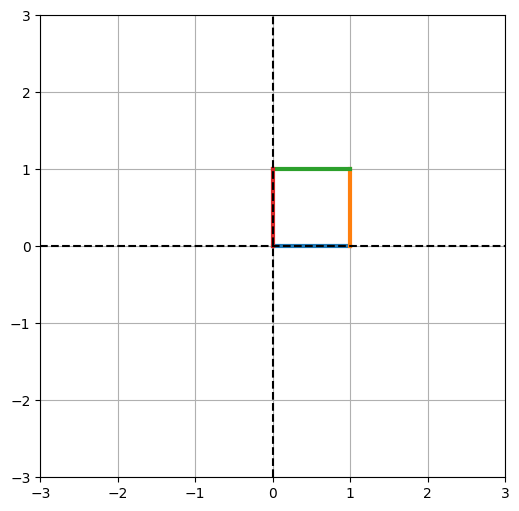

In [12]:
unit_square = [np.array([0,0]), np.array([1,0]), np.array([1,1]), np.array([0,1])]
plot_the_polygon(unit_square)
plt.show()

Let's use matrices $T_1$ and $T_2$ to rotate the square by 45 degrees.

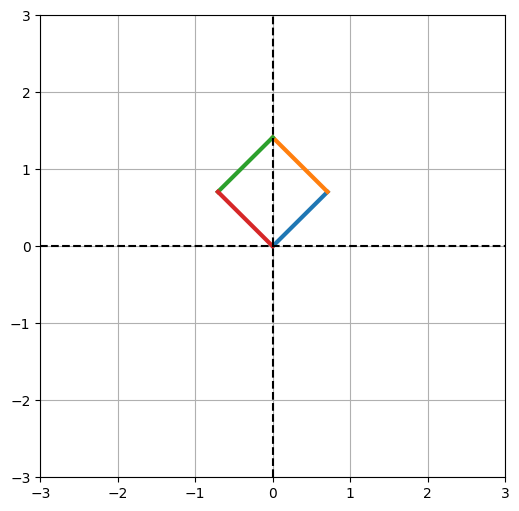

In [13]:
rotated_square_15 = transform_the_polygon(unit_square, T1)
rotated_square_45 = transform_the_polygon(rotated_square_15, T2)
plot_the_polygon(rotated_square_45)

Next, let's use matrices $T_1$ and $T_2$ to rotate the square by 60 degrees.

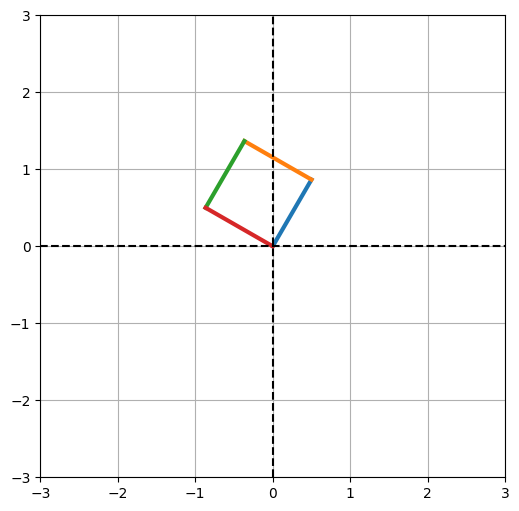

In [14]:
rotated_square_30 = transform_the_polygon(unit_square, T2)
rotated_square_60 = transform_the_polygon(rotated_square_30, T2)
plot_the_polygon(rotated_square_60)

Now, lets find a single matrix $T_3$ that rotates the unit square by 60 degrees.

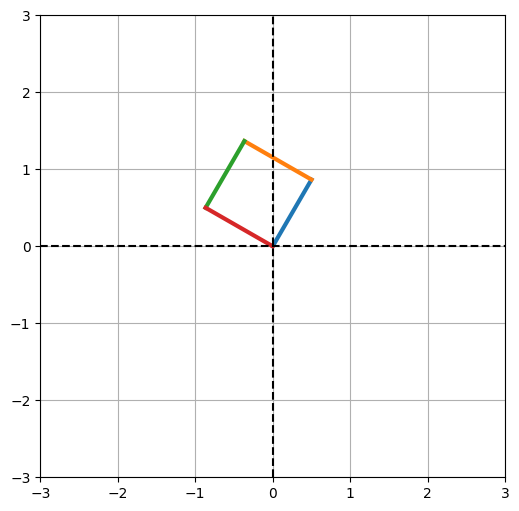

In [15]:
T3=np.matmul(T2,T2)
rotated_square_T3 = transform_the_polygon(unit_square, T3)
plot_the_polygon(rotated_square_T3)

And finally, we can "reflect" the square about the y-axis:

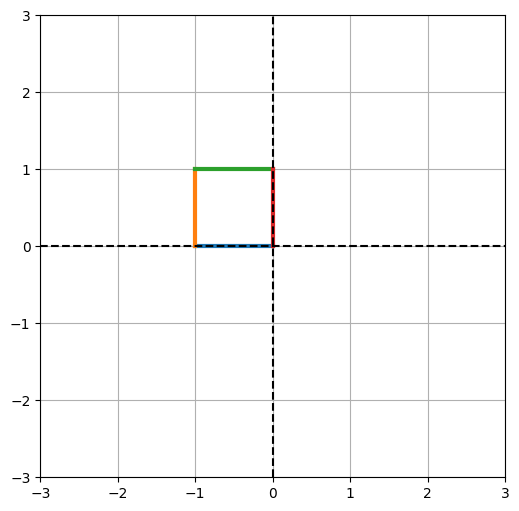

In [16]:
reflected_square = transform_the_polygon(unit_square, Re_y)
plot_the_polygon(reflected_square)

The next natural question to ask is the following: Does the *order* in which you apply these operations matter?

Let's see what happens to the unit square when we rotate the matrix by 60 degrees, and then reflect it along the y-axis.

In [17]:
# As the name indicates, R_60 rotates the matrix by 60 degrees.
rotation_angle = np.pi/3 # 60 degrees in radians
R_60 = np.array([[np.cos(rotation_angle), -np.sin(rotation_angle)],
                 [np.sin(rotation_angle), np.cos(rotation_angle)]])

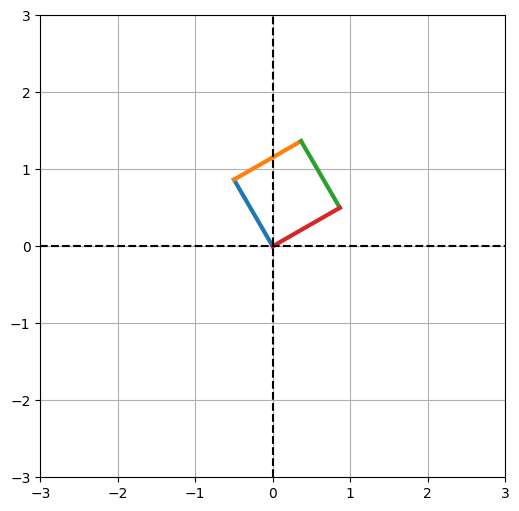

In [18]:
reflected_after_rotated_square = transform_the_polygon(unit_square, R_60)
reflected_after_rotated_square = transform_the_polygon(reflected_after_rotated_square, Re_y)
plot_the_polygon(reflected_after_rotated_square)

Now, let's reflect *before* rotating.

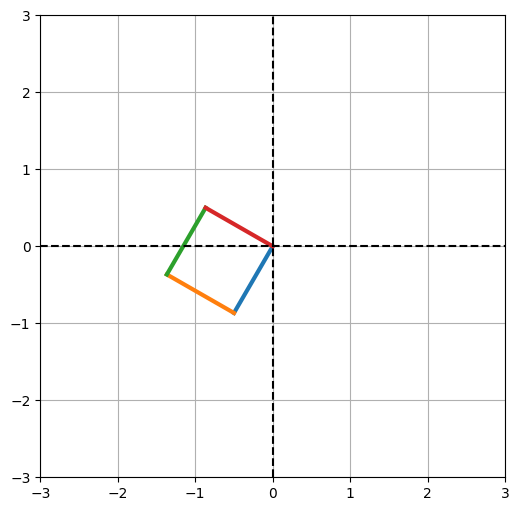

In [20]:
rotated_after_reflected_square = transform_the_polygon(unit_square, Re_y)
rotated_after_reflected_square = transform_the_polygon(rotated_after_reflected_square, R_60)
plot_the_polygon(rotated_after_reflected_square)